In [149]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for cluster analysis
from sklearn.cluster import KMeans

# for PCA - Principal Component Analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram,linkage
%matplotlib inline

#Let's read UseArrests.csv

df:pd.DataFrame = pd.read_csv("UsArrests.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.200,236,58,21.200
1,Alaska,10.000,263,48,44.500
2,Arizona,8.100,294,80,31.000
3,Arkansas,8.800,190,50,19.500
4,California,9.000,276,91,40.600


In [150]:
# checking city column for unexpected/missing values and any misspellings
city_un = df['City'].unique()
city_un.sort()
city_un

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [151]:
# checking murder column for unexpected values

murder_un = df['Murder'].unique()
murder_un.sort()
murder_un

array([ 0.8,  2.1,  2.2,  2.6,  2.7,  3.2,  3.3,  3.4,  3.8,  4. ,  4.3,
        4.4,  4.9,  5.3,  5.7,  5.9,  6. ,  6.3,  6.6,  6.8,  7.2,  7.3,
        7.4,  7.9,  8.1,  8.5,  8.8,  9. ,  9.7, 10. , 10.4, 11.1, 11.3,
       11.4, 12.1, 12.2, 12.7, 13. , 13.2, 14.4, 15.4, 16.1, 17.4])

# Duplicate Rows

Although there are 50 states ('cities' means 'states' here) and 50 rows it is unlikely that there are any duplicate rows, but worth checking anyway.

In [152]:
duplicates = df[df.duplicated()]
print("Duplicated Rows")
duplicates

Duplicated Rows


,City,Murder,Assault,UrbanPop,Rape


# Changing Dtypes

'City' is in an object dtypes, so I'm going to change this to string. I am also going to change the name of this column to 'State' as it has been misnamed in this df, and the change helps me keep in mind what I'm measuring.

In [153]:
#changing dtype to string

df['City'] = df['City'].astype('string')

# confirming that the change worked
print(type(df['City'][0]))

# Renaming the 'City' column to 'State'

df = df.rename(columns={'City':'State'}) # Now the Column was renamed to 'State'
df

<class 'str'>


,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.200,236,58,21.200
1,Alaska,10.000,263,48,44.500
2,Arizona,8.100,294,80,31.000
3,Arkansas,8.800,190,50,19.500
4,California,9.000,276,91,40.600
5,Colorado,7.900,204,78,38.700
6,Connecticut,3.300,110,77,11.100
7,Delaware,5.900,238,72,15.800
8,Florida,15.400,335,80,31.900
9,Georgia,17.400,211,60,25.800


# Data Distribution and Outliers
Below I'm going to get some basic information about the data and check some outliers using box-plot

In [154]:

df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000,50.000,50.000,50.000
mean,7.788,170.760,65.540,21.232
std,4.356,83.338,14.475,9.366
min,0.800,45.000,32.000,7.300
25%,4.075,109.000,54.500,15.075
50%,7.250,159.000,66.000,20.100
75%,11.250,249.000,77.750,26.175
max,17.400,337.000,91.000,46.000


This dataset is looking at arrests per 100,000 residents, and 'UrbanPop' is the percent of the population living in Urban areas.

A look at very basic descriptive statistics tells us that the highest arrest rate for a crime is for assault (which is considerably higher than the others), followed by rape and murder. A high std deviation for assault denotes high variation in the dataset for this variable, and a low std deviation for murder denotes much less variation (i.e. it's unlikely any given stated has many more or fewer arrests per 100,000 people for murder than 7). I'm going to make a histogram as well to see how the data is distributed when visualised.

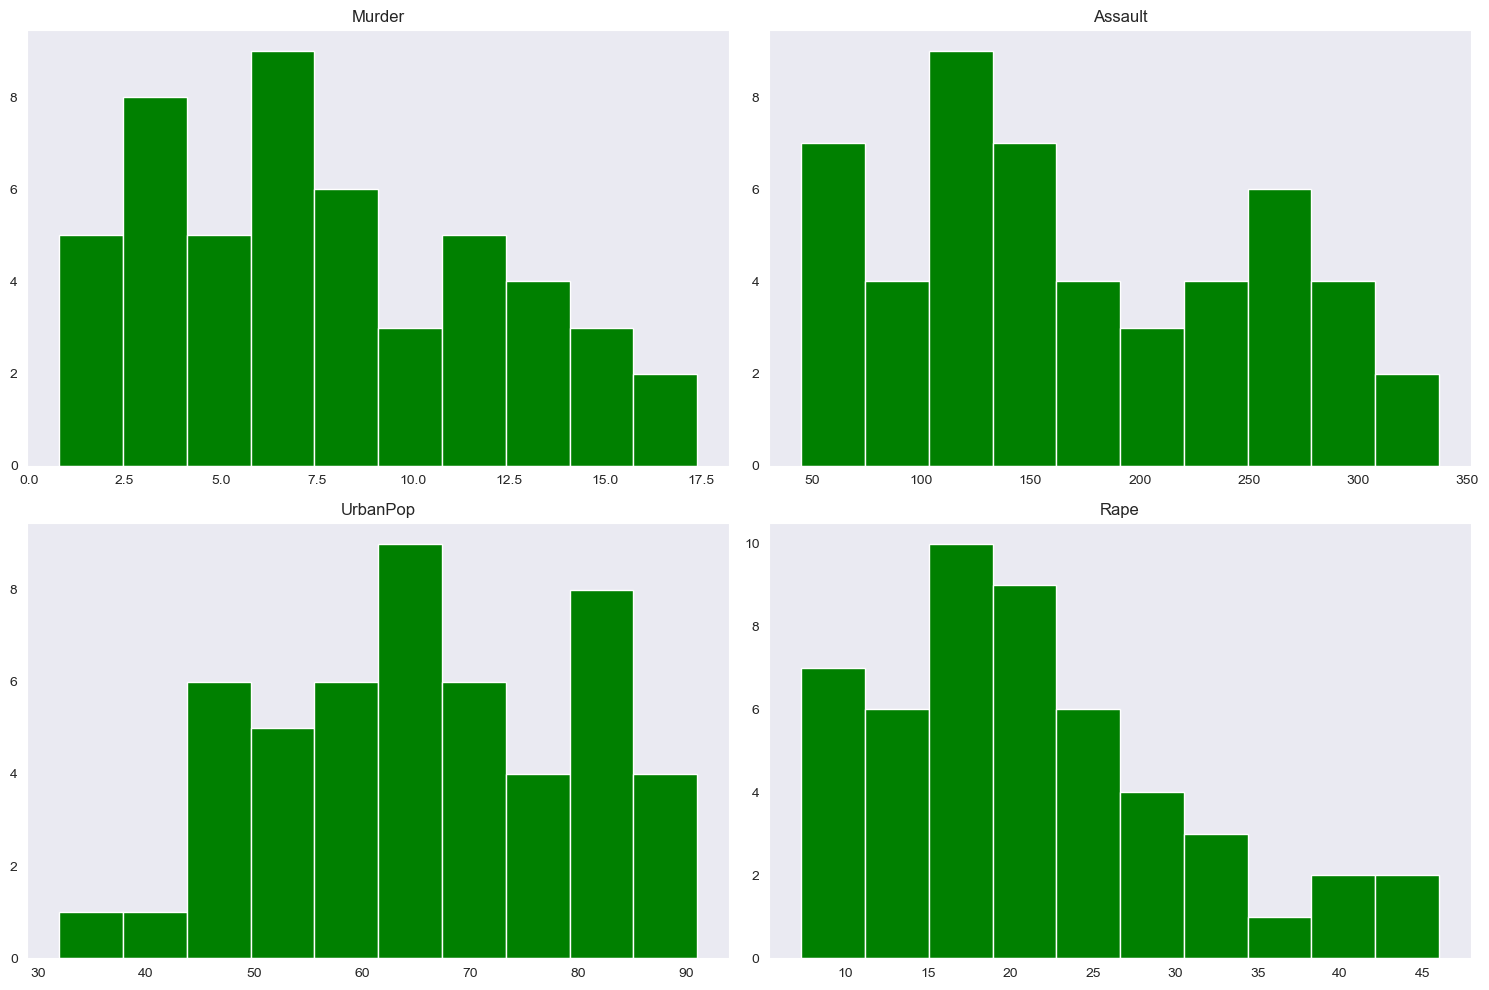

In [155]:
# Plotting  Histograms

histograms = df.hist(color="green",grid=False, figsize=(15,10)) #This can also be done for each column individually by calling hist on that column
plt.tight_layout()
plt.show()


The arrest rate distribution for both murder and assault is bimodal (with a second small peak for the rape histogram, though it's so small I would call this uni-modal). This suggests that the datapoints can be split into 2 groups, which I will explore in the cluster analyses. The UrbanPop fits a more normal uni-modal distribution.

Of interest is the rape histogram - the frequency on the y-axis for the other graphs only goes up to 8, whereas for rape it goes up to 20. At least 20 states have an arrest rate of 15-20 per 100,000 for rape. Additionally, the graph is leptokurtic (high kurtosis, heavy tail), meaning 1) it's more concentrated around the mean than the other graphs and 2) there are likely to be outliers. I will explore this using box-plots below.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d08632d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d08641280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d08632a00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d08641760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d08641940>],
 'means': []}

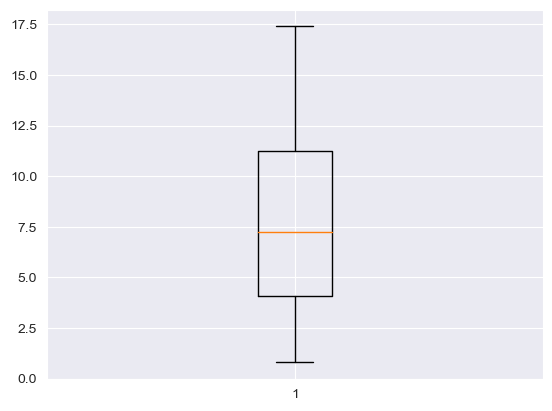

In [156]:
x = df['Murder']
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d2bb94ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d2bba4160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d2bb947f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d2bba4700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d2bba49d0>],
 'means': []}

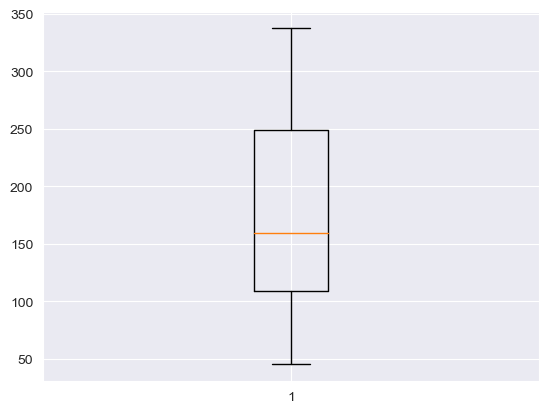

In [157]:
x = df.Assault
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d2bbc2490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d2bbc2be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d2bbc21c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d2bbcf070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d2bbcf340>],
 'means': []}

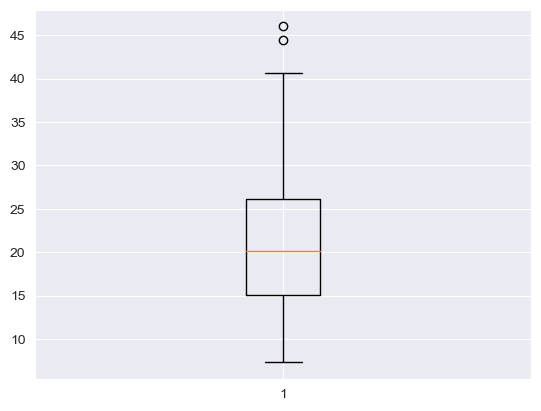

In [158]:
x = df.Rape
plt.boxplot(x)

The above box-plots for murder and assault suggest no outliers, but there are two slight outliers for rape, as predicted by the histogram. Below, I'll sort the df by this column and see which states these outliers belong to.

In [159]:
df.sort_values('Rape').tail()

,State,Murder,Assault,UrbanPop,Rape
21,Michigan,12.100,255,74,35.100
5,Colorado,7.900,204,78,38.700
4,California,9.000,276,91,40.600
1,Alaska,10.000,263,48,44.500
27,Nevada,12.200,252,81,46.000


The outliers belong to Alaska and Nevada. The outliers do not seem significant and only affect one variable. For now, it's just useful to know that there are a couple of outliers, though they are small - if anything unusual comes up in the analyses below, I'll refer back to this knowledge, but these datapoints don't need to be cleaned or sorted.

# Correlational Analysis

<class 'pandas.core.frame.DataFrame'>


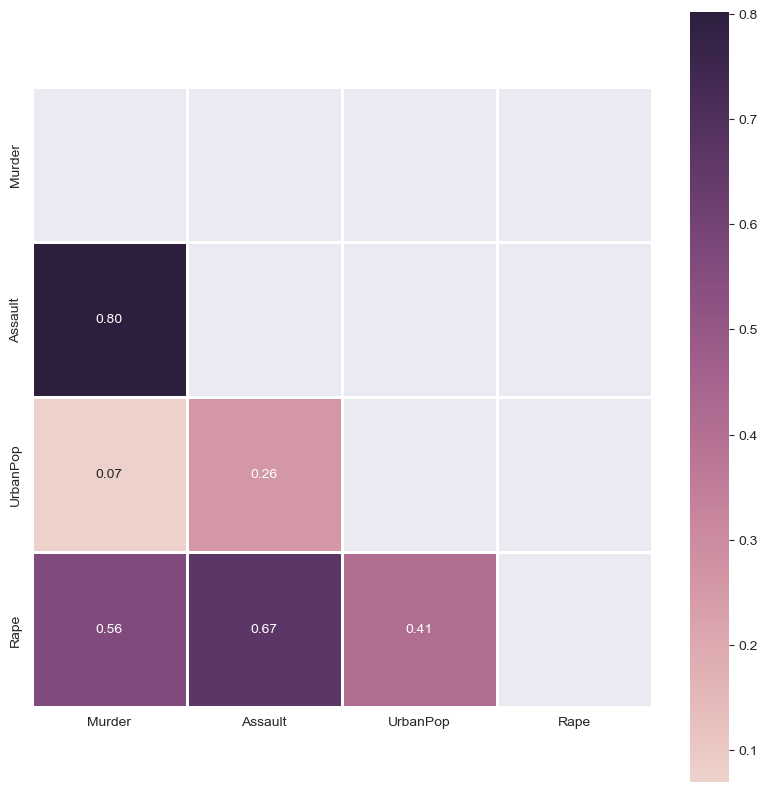

In [160]:
# choosing color for the heatmap

colormap = sns.diverging_palette(220,10, as_cmap=True)
print(type(df))
def corr_heatmap(dataframe):

    # get correlations
    corrs = dataframe.corr()
    #plot fig size
    fig, ax = plt.subplots(figsize=(10,10))

    # to mask mirrored side of heatmap
    dropSelf = np.zeros_like(corrs)
    dropSelf[np.triu_indices_from(dropSelf)] = True


    # Generate Heat Map, with annotations of the correlation strength as 2-decimal floats
    ax = sns.heatmap(corrs, cmap=sns.cubehelix_palette(as_cmap=True), annot=True, fmt=".2f", mask=dropSelf, linewidth=2, square=True)

    plt.show()


corr_heatmap(df)


### Discussion

This plot tells us the correlation between each type of crime, and how each relates to the urban population.

There is a high correlation between murder and assault (0.8) and a rape (0.56). Although it's higher for assault, a correlation of 56% between murder and rape is still pretty high.

Assault and rape have a higher correlation (0.67) than murder and rape, meaning that assault and rape arrest rates are better predictors of each other than the are as predictors murder arrest rates.

All of the correlations discussed so far have been above 0.5, and all correlations contained in this heat map are positive, meaning that there are no variables that decrease the chance of another variable increasing. Urban population is the worst predictor of arrests for each crime, having almost no predictive value for murder (0.07), a low predictive value for assault (0.26) and a middling predictive value for rape (0.41). From this we can conclude that states with higher urban populations will likely have higher rape arrest rates than states with low proportion urban populations. Conversely - because correlation does not mean causation - access to rape arrest statistics should allow us to predict if a state as a high, medium or low urban population.

I would like to briefly go back to the descriptive statistics in the data cleaning section - murder arrest rates has the lowest standard deviation of any of the crimes by a significant degree. Combined with the fact that proportion of urban population makes little difference to our understanding of murder arrest rates, it seems that murder arrest rates stay relatively consistent between States whilst the other crime arrest rates are more varied. It's possible that other crimes are impacted by a variety of factors - for example, socioeconomic or demographic - where murder is less impacted by these external factors. This would be very interesting to study, but this dataset does not contain the information for investigation.

Given the relatively high correlation of arrest rates with each other and low correlation between each and urban population, I would expect these (the arrest rates combined, then the urban population) to take up different levels of importance in a PCA where one principal component is more correlated with arrest rates and another with urban population.

## Principal Component Analysis

In [161]:
X = df.drop(['State'], axis=1).values.squeeze()

pca = PCA() #

X_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(X_trans)

df_pca.head()


,0,1,2,3
0,64.802,11.448,-2.495,2.408
1,92.827,17.983,20.127,-4.094
2,124.068,-8.830,-1.687,-4.354
3,18.340,16.704,0.210,-0.521
4,107.423,-22.520,6.746,-2.812


In [162]:
std = df_pca.describe().transpose()['std']

print(f'Standard Deviation : {std.values}')


Standard Deviation : [83.73240025 14.21240185  6.48942607  2.48279   ]


In [163]:
print(f'Proportion od variable explained : {pca.explained_variance_ratio_}')

Proportion od variable explained : [9.65534221e-01 2.78173366e-02 5.79953492e-03 8.48907879e-04]


In [164]:
print(f'Cumulative Proportion :{np.cumsum(pca.explained_variance_)}')

Cumulative Proportion :[7011.11485102 7213.10721735 7255.2198681  7261.38411429]


## Biplot and Feature Importance

In [165]:
# define state

In [166]:
# define state
state = df.State.values

def biplot(score,coeff,labels=None):
    xs:np.array() = score[:,0]
    ys:np.array() = score[:,1]
    n = coeff.shape[0]
    scalex:float  = 1.0/(xs.max() - xs.min())
    scaley:float = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt:str = state[i]
        ax.annotate(txt,(xs[i] * scalex, ys[i] * scaley))

    for i in range(0,n):
        ax.arrow(0,0, coeff[i,0],coeff[i,1],color='r', alpha = 0.5)

        if labels is None:
            ax.text(coeff[i,0] * 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='green', ha='center', va = 'center')
        else:
            ax.text(coeff[i,0] * 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va = 'center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

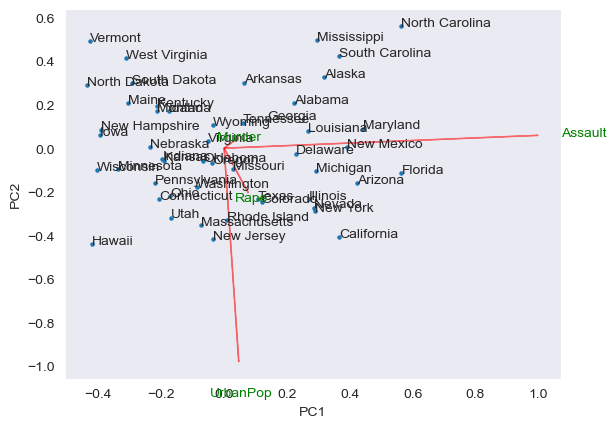

In [167]:
df_no_state = df.drop(['State'], axis=1)

labels = df_no_state.columns

biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),labels=list(labels))
plt.show()


The eigenvectors for rape are smaller than for urban population and assault, and I cannot see murder distingtuised here. In this graph, the first PC is dominated by assault and the second by urban population. I will standardise below to see if this changes.

In [172]:
# feature of importance

pd.set_option('display.float_format', lambda x:'%.3f' %x)

pca1 = abs(pca.components_[0])
pca2 = abs(pca.components_[1])

feat_df = pd.DataFrame()
feat_df['Features'] = list(labels)

feat_df['PC1 Importance'] = pca1
feat_df['PC2 Importance'] = pca2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.045
1,Assault,0.995,0.059
2,UrbanPop,0.046,0.977
3,Rape,0.075,0.201


Supporting the bi-plot above, assault is most important in the first PC with the other variables having very little relevance, and urban population is the most important for PC2. Murder and rape arrest rates take up very little space in either PC, though the importance of murder is approximately the same in both.

## Standardised

In [170]:
# standardising the dataset

X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342
5,1.515,-0.988,1.095,0.001
6,-1.359,-1.089,-0.643,-0.118
7,0.048,-0.325,-0.719,-0.882
8,3.013,0.039,-0.577,-0.096
9,1.639,1.279,-0.342,1.077


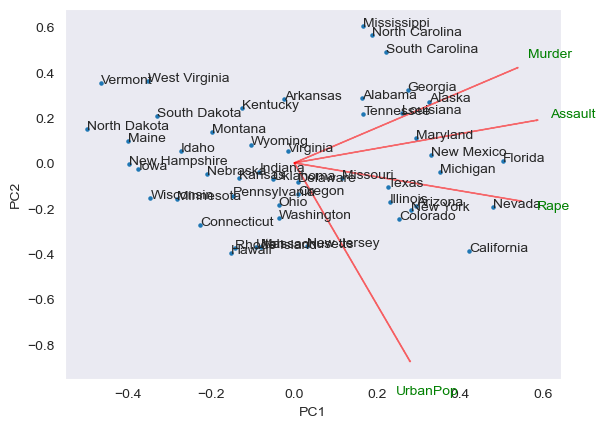

In [171]:
# re-plotting bi-plot with standardised data
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2,:]),list(labels))
plt.show()

From the biplot and the features plot, we can ascertain that PC1 is correlated mostly with murder, assault, and rape, and that higher rates of these crimes lead to a higher rating on PC1. Murder is only marginally less important for PC2 as PC1 - perhaps this is because Murder has the lowest mean and standard deviation.

PC2 is mostly interested in Urban Population, such that a low urban population leads to a higher score in PC1. We can see that PC2 is negatively correlated with urban population by looking at North Carolina and Vermont. North Carolina his high on both axes. This makes sense, as  North Carolina has the highest rate of assault arrest and is in the top 10 for murder, but has a low urban population. Vermont, however, is high on the y-axis and low on the x-axis. Vermont is the state with the lowest urban population, and low on the x-axis, being low (bottom 10) in rates of rape, and bottom 5 for assault.

Moreover, The length of each line is approximately the same, suggesting that the eigenvectors are approximately the same.


Please note that I got these 'top 10'/'bottom 10' calculations from printing the df sorted by values for each column. I decided not to include this in the notebook as it took up a lot of space and provided little benefit, but please do feel free to check this by pasting this below:

for bottom 10:
```python
df.sort_values(by = ['column']).head(10)
```
for top 10:
```python
df.sort_values(by = ['column'], ascending = False).head(10)
```

In [173]:
pca1 = abs(std_pca.components_[0])
pca2 = abs(std_pca.components_[1])

feat_df = pd.DataFrame()
feat_df['Features'] = list(labels)

feat_df['PC1 Importance'] = pca1
feat_df['PC2 Importance'] = pca2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


In the standardised features plot, arrest rates for each crime take up approximately equal importance in PC1 and PC2 is less heavily weighted (though only marginally) by urban population.

## PCA Heatmap

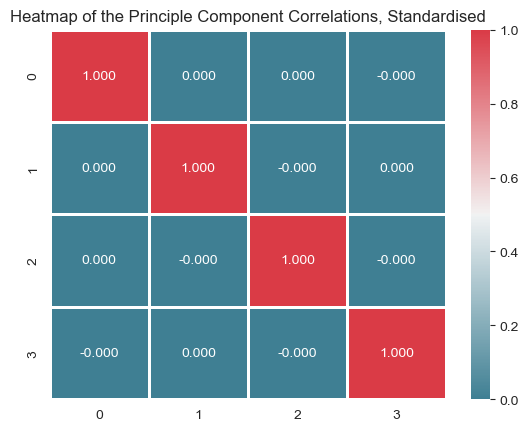

In [178]:
# creating heatmap to see if PC's are correlated
ax = sns.heatmap(df_std_pca.corr(),cmap=colormap,linewidths=1, annot=True,fmt=".3f")
plt.title("Heatmap of the Principle Component Correlations, Standardised")
plt.show()

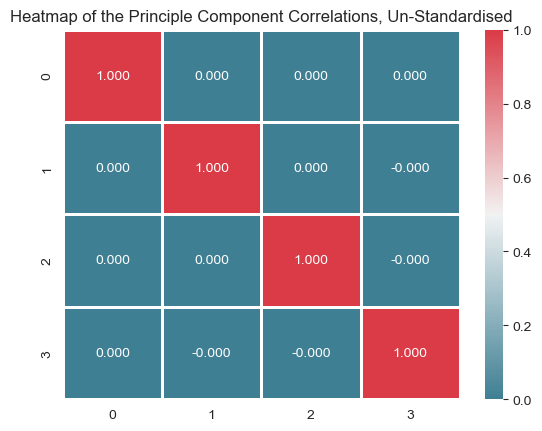

In [179]:
# creating heatmap to see if PC's are correlated Un-Standardised
ax = sns.heatmap(df_pca.corr(),cmap=colormap,linewidths=1, annot=True,fmt=".3f")
plt.title("Heatmap of the Principle Component Correlations, Un-Standardised")
plt.show()

As you can see, whether standardised or unstandardised, there are no correlatesion between the principal components - they all explain different types of variation

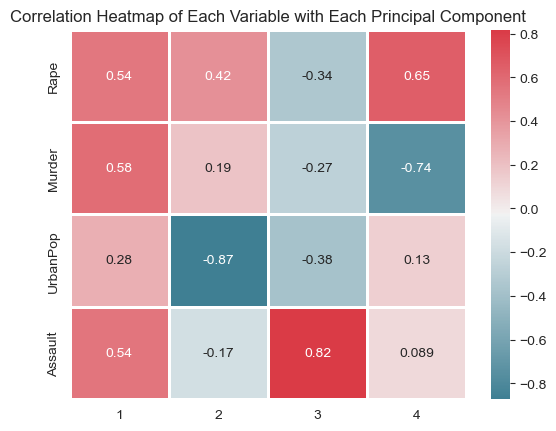

In [183]:
arrest_df = pd.DataFrame(df[['Rape','Murder','UrbanPop','Assault']],index=df.index)
components = pd.DataFrame(std_pca.components_,columns=arrest_df.columns, index=range(1,5)).transpose()
ax = sns.heatmap(components,cmap=colormap,linewidth=1, annot=True)
plt.title('Correlation Heatmap of Each Variable with Each Principal Component')
plt.show()

This heatmap confirms the relationship between urban population and PC2, which is negative, meaning a lower urban pop means a higher PCA score. This was anticipated in the observation of the bi-plot. Assault arrest rates also have a negative correlation in PC2.

It's interesting that assault plays a significant role in PC3 (where the others are negatively correlated), and rape a significant role in PC4. All variables are correlated with PC1, but urban population less so (As discussed above).